
### Attribute Information:

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- Weather data observations
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8
- FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely fire  and not fire

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('D:/Ranjeeta/DATA_SCIENCE/ML_Projects/Algerian_Forest_Fire/notebooks/Algerian_forest_fires_cleaned_dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Data Cleaning

In [10]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [11]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df['Region'] = df['Region'].astype(int)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df = df.dropna().reset_index(drop = True)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [18]:
df = df.drop(122).reset_index(drop = True)

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df[['month', 'day','year','Temperature', 'RH','Ws']] = df[['month', 'day','year','Temperature', 'RH','Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [25]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


## Exploratory Data Analysis

In [27]:
## drop day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [28]:
## categories in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [30]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [31]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [32]:
df_copy['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

C:\Users\Ranjeeta_Kumari\AppData\Local\Temp\ipykernel_22064\295466757.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


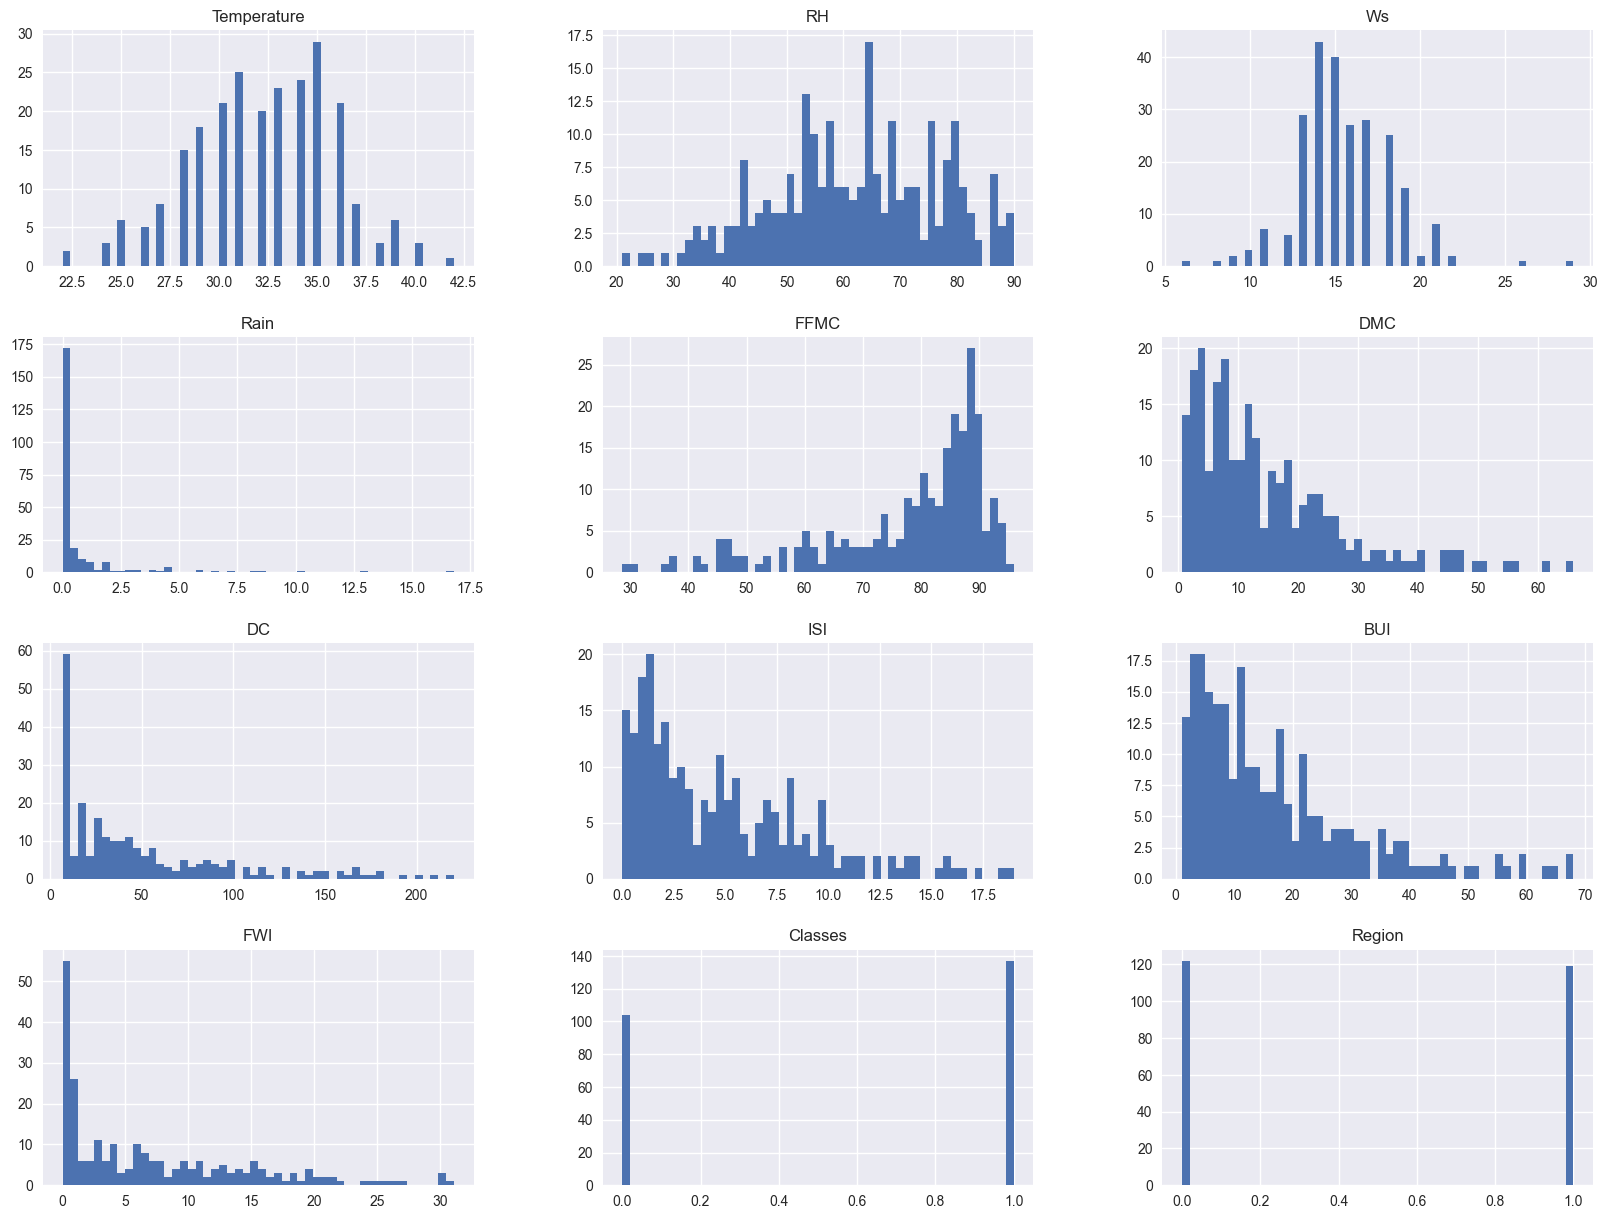

In [33]:
  ## Plot desnity plot for all features
  plt.style.use('seaborn')
  df_copy.hist(bins=50,figsize=(20,15))
  plt.show()

In [34]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

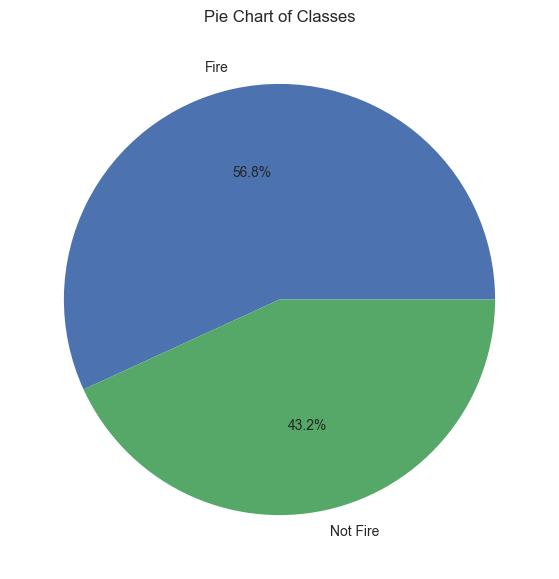

In [35]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [36]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330
FWI,0.566649,-0.578951,0.024420,-0.321227,0.688538,0.874943,0.737783,0.922326,0.856918,1.000000,0.716898,0.206362


In [37]:
#sns.heatmap(df.corr(),annot=True)

<Axes: >

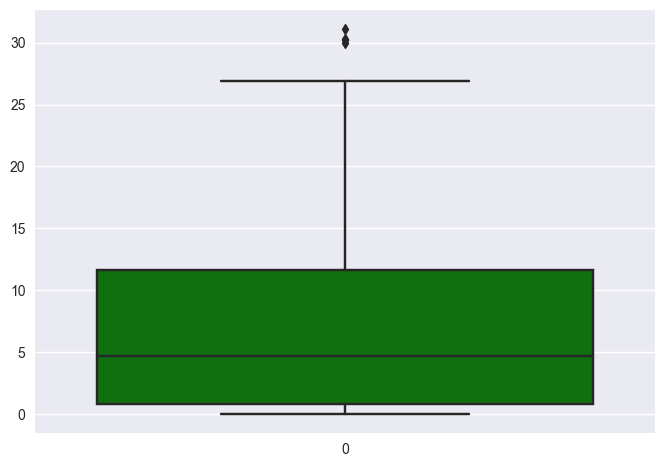

In [38]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

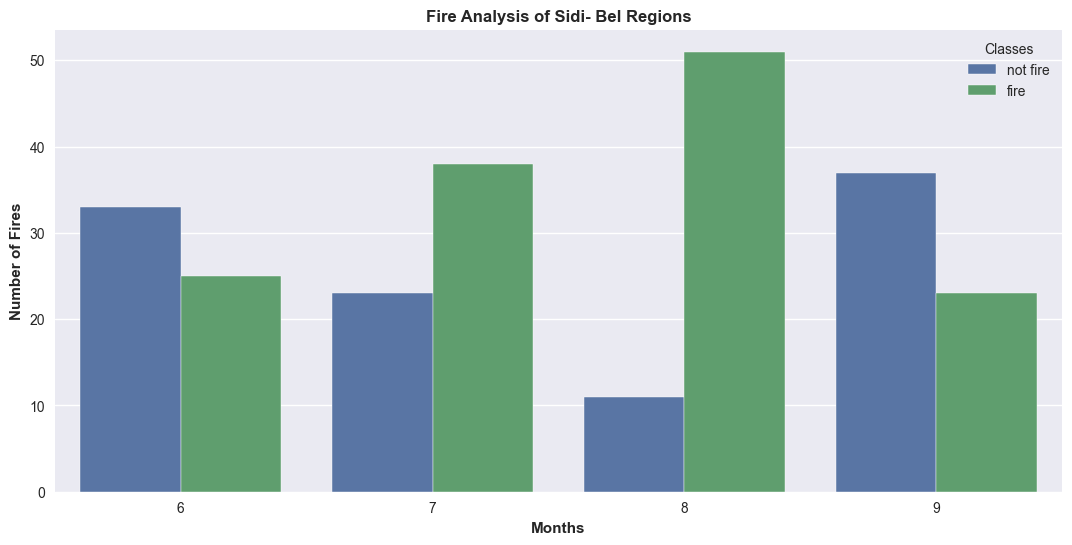

In [41]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

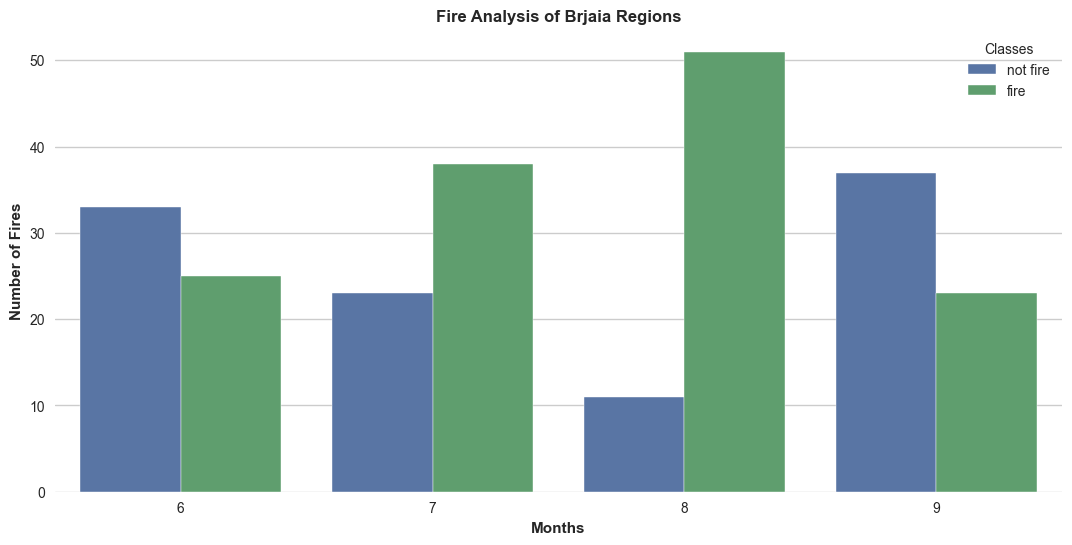

In [42]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [43]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
## Encodng

In [45]:
df_copy['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [46]:
df = df_copy

In [47]:
## Independednt and Dependednt Features
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [48]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [49]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [50]:
## Tain Ttest Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 11), (61, 11), (180,), (61,))

In [54]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


<Axes: >

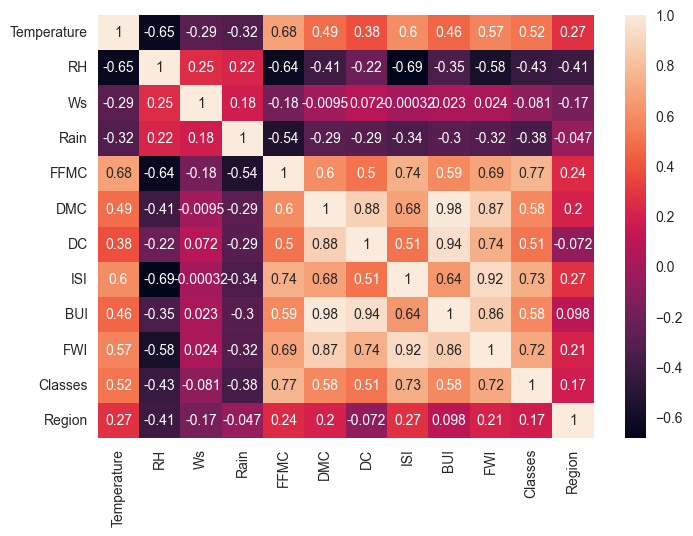

In [55]:
sns.heatmap(df.corr(), annot = True)

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [58]:
corr_features

{'BUI', 'DC'}

In [59]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 9), (61, 9))

### Feature Scaling Or Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [61]:
X_train_scaled

array([[-0.82582663,  0.76875417,  1.25919129, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [-0.03373714, -0.48680422, -0.57458243, ...,  0.06950049,
         0.89442719,  1.02247472],
       [ 2.07850149, -2.07277271, -0.20782769, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.88194595,  0.90091821,  0.5256818 , ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.286412  , -0.48680422, -0.20782769, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.5617968 ,  0.96700023,  1.99270077, ..., -0.86337417,
        -1.11803399, -0.97801929]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\Ranjeeta_Kumari\AppData\Local\Temp\ipykernel_22064\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

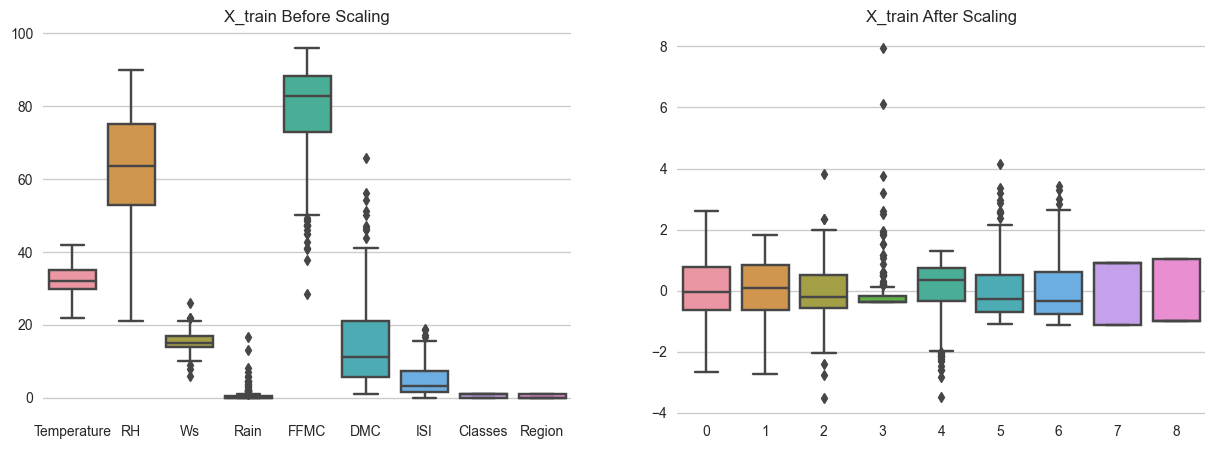

In [62]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Linear Regression Model

Mean absolute error 0.661262370075127
R2 Score 0.9836843464471654


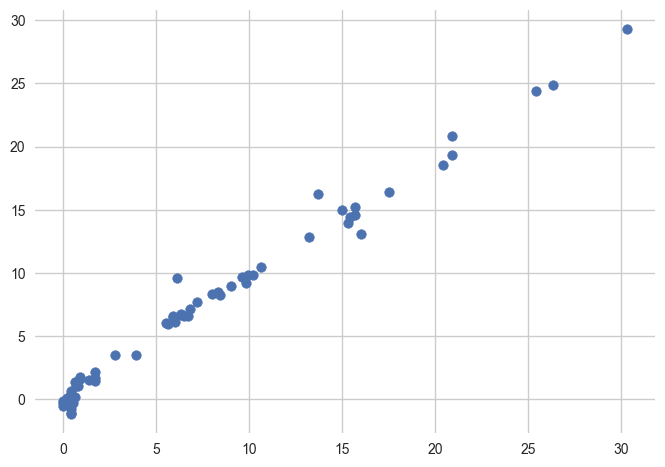

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.2522655115292305
R2 Score 0.9473075426805143


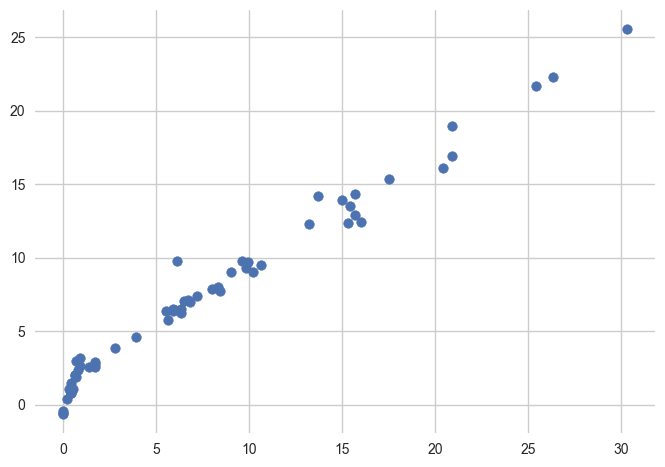

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [65]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.6948520208585796
R2 Score 0.9828599317980785


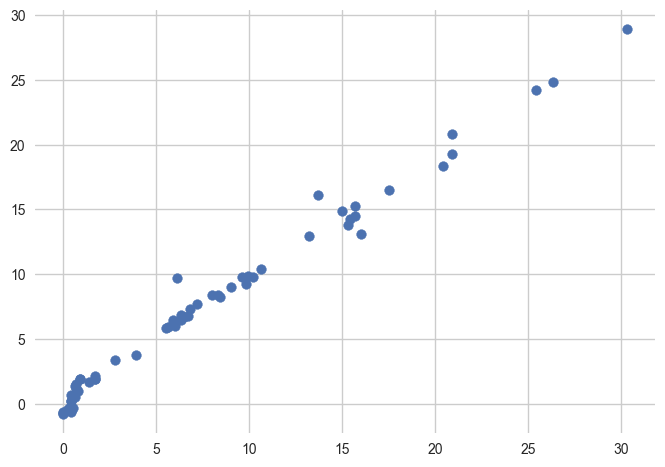

In [66]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

### Ridge Regression model

Mean absolute error 0.6864171979933391
R2 Score 0.9830258655702742


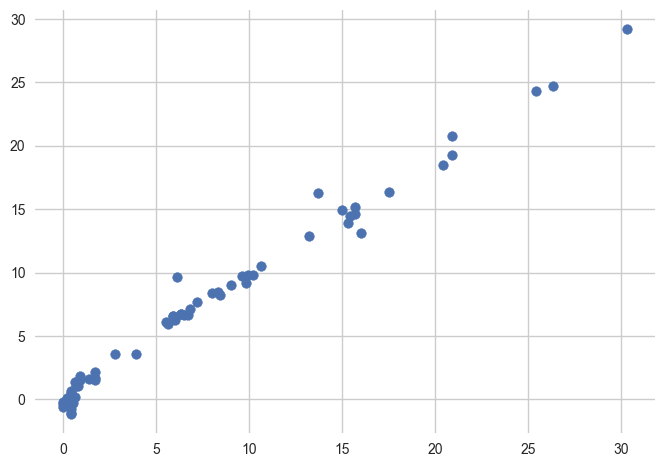

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8884598931635311
R2 Score 0.9756362083772786


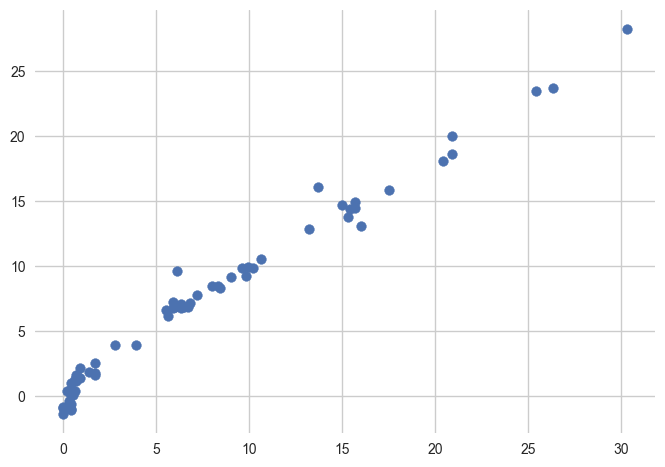

In [68]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [69]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elasticnet Regression

Mean absolute error 1.924851265262548
R2 Score 0.8823512748789929


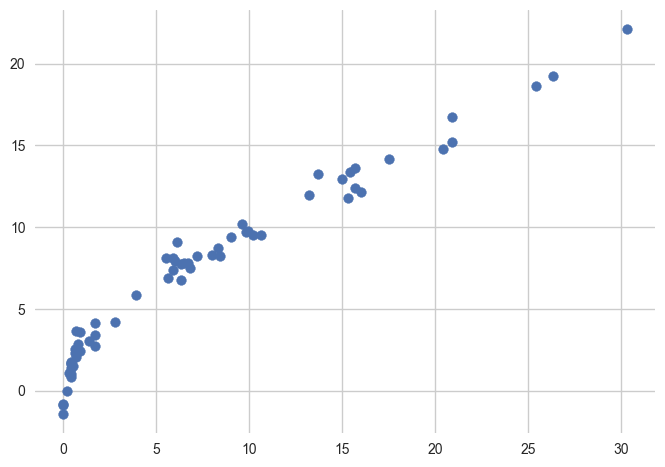

In [70]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7523532380645858
R2 Score 0.9811284001563361


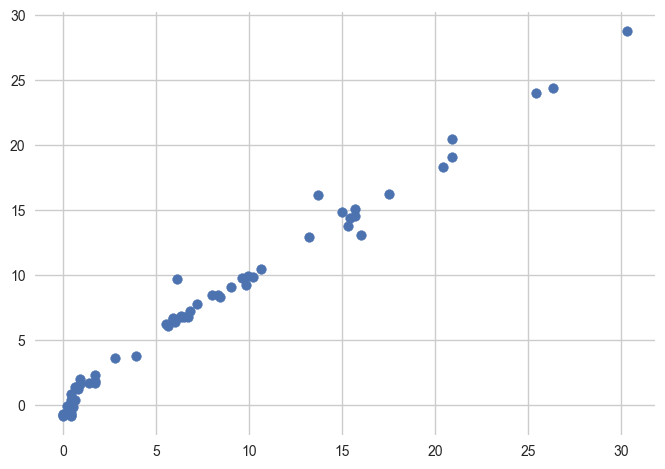

In [71]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [72]:
elasticcv.alphas_

array([13.52679383, 12.6151332 , 11.76491544, 10.97199952, 10.23252347,
        9.54288564,  8.89972709,  8.29991527,  7.74052876,  7.21884302,
        6.73231717,  6.27858152,  5.85542614,  5.46079002,  5.09275104,
        4.74951667,  4.42941514,  4.13088739,  3.8524794 ,  3.59283518,
        3.35069012,  3.12486482,  2.91425939,  2.71784806,  2.5346742 ,
        2.36384564,  2.20453035,  2.05595239,  1.91738808,  1.78816254,
        1.66764637,  1.55525258,  1.45043376,  1.35267938,  1.26151332,
        1.17649154,  1.09719995,  1.02325235,  0.95428856,  0.88997271,
        0.82999153,  0.77405288,  0.7218843 ,  0.67323172,  0.62785815,
        0.58554261,  0.546079  ,  0.5092751 ,  0.47495167,  0.44294151,
        0.41308874,  0.38524794,  0.35928352,  0.33506901,  0.31248648,
        0.29142594,  0.27178481,  0.25346742,  0.23638456,  0.22045304,
        0.20559524,  0.19173881,  0.17881625,  0.16676464,  0.15552526,
        0.14504338,  0.13526794,  0.12615133,  0.11764915,  0.10

In [73]:
## Pickle the machine learning model, preprocessing  model Standard Scaler

In [74]:
scaler

StandardScaler()

In [75]:
ridge

Ridge()

In [79]:
import pickle
pickle.dump(scaler, open('D:\Ranjeeta\DATA_SCIENCE\ML_Projects\Algerian_Forest_Fire\models\scaler.pkl', 'wb'))
#pickle.dump(ridge, open('ridge.pkl', 'wb'))

In [83]:
pickle.dump(ridge, open('D:/Ranjeeta/DATA_SCIENCE/ML_Projects/Algerian_Forest_Fire/models/ridge.pkl', 'wb'))